In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path

DATA_DIR = Path.cwd() / 'data'
OUTPUT_DIR = Path.cwd() / 'output'

def printUnique(df, col=None):
    if col is None:
        print(f"total index: {df.index.size}")
        print(f"unique index: {df.index.unique().size}")
    else:
        print(f"total {col}: {df[col].size}")
        print(f"unique {col}: {df[col].unique().size}")

In [2]:
"""
Read GSE data
"""
# disease state = characteristics_ch1.8
# sex = characteristics_ch1.9
# age = characteristics_ch1.11
df_gse = pd.read_csv(DATA_DIR / 'GSE_data.csv', index_col=0)
df_gse = df_gse.rename(columns={
    'characteristics_ch1.8': 'state',
    'characteristics_ch1.9': 'sex',
    'characteristics_ch1.11': 'age'
})
df_gse.columns = [x.split('_')[0] for x in df_gse.columns]

C:\Users\XIAO\AppData\Local\Temp\ipykernel_10000\162102992.py:7: DtypeWarning: Columns (54698,54699,54700,54702,54703,54706,54717,54722,54723,54724,54725,54726,54727,54728,54729,54730,54731,54732,54733,54734,54735,54736,54737,54738,54739,54740,54741,54742,54743,54744,54745) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gse = pd.read_csv(DATA_DIR / 'GSE_data.csv', index_col=0)


In [3]:
"""
Process Demographic Data
"""
import re

df_demo = df_gse[['state', 'sex', 'age']]

df_demo['state'] = df_demo['state'].map(lambda x: 0 if 'normal' in x else 1)
df_demo['age'] = df_demo['age'].map(lambda x: re.sub('[^\d\.]', '', x.split(' ')[1]))
df_demo['sex'] = df_demo['sex'].map(lambda x: 0 if 'male' in x else 1)

df_demo = df_demo.astype({
    'state': 'boolean',
    'age': 'float64',
    'sex': 'category',
})

C:\Users\XIAO\AppData\Local\Temp\ipykernel_10000\265723313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['state'] = df_demo['state'].map(lambda x: 0 if 'normal' in x else 1)
C:\Users\XIAO\AppData\Local\Temp\ipykernel_10000\265723313.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['age'] = df_demo['age'].map(lambda x: re.sub('[^\d\.]', '', x.split(' ')[1]))
C:\Users\XIAO\AppData\Local\Temp\ipykernel_10000\265723313.py:10: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [4]:
# Retrieve curated EV gene list
df = pd.read_csv(DATA_DIR / 'NDEV.csv')
NDEV_genes = list(df['Gene Symbol'].unique())

# Get overlapping genes b/w the curated EV gene list & gene expression matrix
sel_cols = []
for x in NDEV_genes:
    sel_cols.extend([col for col in df_gse.columns if x == col])

# Remove duplicates and aggregate unique genes based on average gene expression
sel_cols = list(dict.fromkeys(sel_cols))
df_ge = df_gse[sel_cols].T.groupby(level=0).mean().T

#df_ge

In [5]:
# Merge dataframes
df_ge_demo = pd.merge(df_ge, df_demo, left_index=True, right_index=True)
df_ge_demo

,A2M,ACADM,ACTA2,ACTB,ACTG1,ACTG2,ACTN4,AGO1,AGO2,AHCY,...,WDR36,YWHAB,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,state,sex,age
GSM119615,315.357861,1115.99990,43.680054,3137.125806,8158.849122,57.772180,91.84936,141.124652,162.454470,131.206340,...,102.605740,3701.521920,654.068322,9894.0540,378.73047,4050.320900,1826.993857,False,0,63.0
GSM119616,133.123514,308.68770,68.303781,5282.764398,8444.596644,33.838295,224.92722,173.444831,116.628925,137.059050,...,44.274835,5994.386800,3125.628808,8084.6353,227.28784,4423.008933,3451.269903,False,0,85.0
GSM119617,289.263175,363.58548,72.544298,1663.021561,2696.717200,142.956650,498.43050,219.709178,176.780565,24.046465,...,54.182565,4190.816017,587.342615,2720.0894,89.93139,1686.093400,676.615738,False,0,80.0
GSM119618,243.749550,422.25632,71.946961,2053.069390,2919.927507,15.645748,424.58704,241.226727,123.340868,134.251920,...,93.862545,5421.386183,739.915912,3303.8538,104.33018,2323.446367,773.617258,False,0,80.0
GSM119619,940.709050,2561.68580,102.302594,8628.693012,32496.793222,15.979145,331.77527,527.038257,485.892048,840.640100,...,394.347720,18097.006333,2483.035660,34797.3300,1238.05530,16744.624133,8940.899184,False,0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM238951,129.956500,952.31700,9.901080,3146.667817,8183.621111,4.033060,438.27900,204.384400,125.680780,186.092000,...,105.089950,5786.372333,1043.132450,13305.9000,285.99500,3566.826667,1214.207780,True,0,82.0
GSM238952,205.449800,1029.54000,49.971600,3593.946133,5296.310000,60.735000,395.47100,160.118300,174.118390,167.138000,...,51.012050,4282.639667,753.208400,19839.8000,179.85500,3269.770000,734.914654,True,0,88.0
GSM238953,242.845250,970.03600,25.870716,2821.420500,6363.220000,23.374800,282.09300,169.950200,168.103640,222.518000,...,77.997250,5434.162333,956.252450,14743.5000,417.89800,4548.496667,1161.201300,True,0,74.0
GSM238955,761.781700,848.24300,4077.544000,3946.069500,5522.175556,363.417000,412.78400,218.216600,190.266558,182.215000,...,98.276450,2833.165667,831.182700,3638.6900,34.87240,2499.086667,363.468380,True,0,72.0


In [6]:
"""
Classification
"""
# Import model covariates (risk factors) from transcriptomics risk model
df = pd.read_csv(OUTPUT_DIR / 'risk_score_transcriptomics_comparison.csv')
df_model = df[['covariate', 'coef']]
df_model['covariate'] = df_model['covariate'].replace({'PTGENDER': 'sex', 'AGE': 'age'})

missing = [x for x in df_model['covariate'] if x not in df_ge_demo.columns]
features = [x for x in df_model['covariate'] if x in df_ge_demo.columns]

df_model = df_model[df_model['covariate'].isin(features)]
df_patients = df_ge_demo[features + ['state']]

print(f"Missing: {missing}")
print(f"Features: {features}")

print(f"feature size:\t{df_patients.drop(['state'], axis=1).columns.size}")
print(f"coef size:\t{df_model['coef'].index.size}")

Missing: ['NT5C1B-RDH14 || RDH14', 'SPERT']
Features: ['DYNLRB1', 'sex', 'age']
feature size:	3
coef size:	3


C:\Users\XIAO\AppData\Local\Temp\ipykernel_10000\802493740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['covariate'] = df_model['covariate'].replace({'PTGENDER': 'sex', 'AGE': 'age'})


In [7]:
"""
Risk score calculation
"""
values = df_patients.drop(['state'], axis=1)
coefs = df_model['coef'].to_numpy()
df_patients['pred'] = values.dot(coefs)
df_patients['pred'].describe()
#df_patients['pred']

C:\Users\XIAO\AppData\Local\Temp\ipykernel_10000\3889975163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patients['pred'] = values.dot(coefs)


count    161.000000
mean      51.935224
std       69.003251
min        1.254142
25%       11.895397
50%       25.222655
75%       67.282368
max      557.129817
Name: pred, dtype: float64

median:		25.222655072553106
less than:	80
equal to:	1
greater than:	80


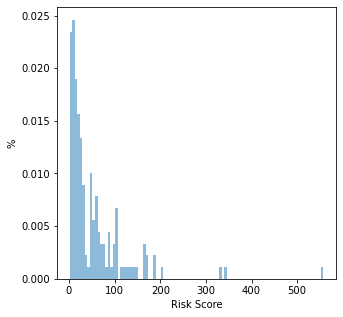

In [8]:
# Quantify risk group distribution
median = df_patients['pred'].median()
print(f"median:\t\t{median}")
print(f"less than:\t{df_patients[df_patients['pred']<median].index.size}")
print(f"equal to:\t{df_patients[df_patients['pred']==median].index.size}")
print(f"greater than:\t{df_patients[df_patients['pred']>median].index.size}")

# Visualize risk group distribution
import statsmodels.api as sm
import matplotlib.pylab as py
import matplotlib.pyplot as plt

kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)
fig = plt.figure(figsize=(5,5))
plt.hist(df_patients['pred'].astype('float'), **kwargs)

plt.gca().set(ylabel='%', xlabel='Risk Score')
#plt.savefig('gene_expr_dist.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [9]:
# Set risk groups
# 0 = low risk
# 1 = high risk
df_patients.loc[df_patients['pred'] < median, 'risk'] = 0
df_patients.loc[df_patients['pred'] >= median, 'risk'] = 1
df_patients = df_patients.astype({'risk': 'boolean'})

df_patients

C:\Users\XIAO\AppData\Local\Temp\ipykernel_10000\1249681373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patients.loc[df_patients['pred'] < median, 'risk'] = 0


,DYNLRB1,sex,age,state,pred,risk
GSM119615,3.601522,0,63.0,False,8.357528,False
GSM119616,3.602138,0,85.0,False,7.908178,False
GSM119617,28.482061,0,80.0,False,74.667809,True
GSM119618,3.351608,0,80.0,False,7.339468,False
GSM119619,39.374763,0,102.0,False,103.400028,True
...,...,...,...,...,...,...
GSM238951,2.700520,0,82.0,True,5.554105,False
GSM238952,7.341260,0,88.0,True,17.864359,False
GSM238953,22.161000,0,74.0,True,57.855717,True
GSM238955,2.537870,0,72.0,True,5.323341,False


Confusion matrix
[[36 38]
 [44 43]]

Acc: 0.4906832298136646
F1: 0.511904761904762
AUC score: 0.5012426219322771


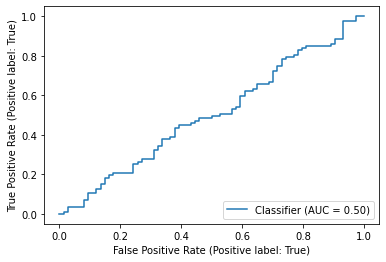

In [10]:
"""
Calculate Metrics
"""
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, RocCurveDisplay

cf_mat = confusion_matrix(df_patients['state'], df_patients['risk'])
acc = accuracy_score(df_patients['state'], df_patients['risk'])
f1 = f1_score(df_patients['state'], df_patients['risk'])
roc_auc = roc_auc_score(df_patients['state'], df_patients['pred'])

print('Confusion matrix')
print(f"{cf_mat}\n")

print(f"Acc: {acc}")
print(f"F1: {f1}")
print(f"AUC score: {roc_auc}")

RocCurveDisplay.from_predictions(df_patients['state'], df_patients['pred'], pos_label=True)
plt.show()